# Machine Learning Assignment 2

### Assignment Objective:

In this assignment You will learn how to use all machine learning algorthms learned so far, this includes: KNN, Decision Tree, Random Forest (Bagging), Boosting (AdaBoost and XGBoost)

The dataset is for predicting lung diseases. The target is the last column "Level" that is a discrete value 'Low', 'Medium', 'High'.

Remember you want to find the best model that is a model where difference between training accuracy and testing accuracy are closest to each other.

## Import libraries:

In [2]:
# Import all libraries needed here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier


#import random forest for me
from sklearn.ensemble import RandomForestClassifier

## Read your dataset

In [3]:
df = pd.read_csv("C:\\Users\\cantg\\OneDrive\\Documents\\Datasets\\cancer patient data sets.csv")

## Convert target from Categorical to int code:
The target variable is categorical values "Low", "Medium", "High". Convert the target from categorical to int coding using the LabelEncoder method. The target should be: 0 (means Low), 1 (means Medium), or 2 (means High).

In [4]:

# Assuming df is your DataFrame and 'Level' is your target column
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

## Check for missing values

In [5]:
#check for missing values

df.isnull().sum()


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

## Check for outliers:

<Axes: >

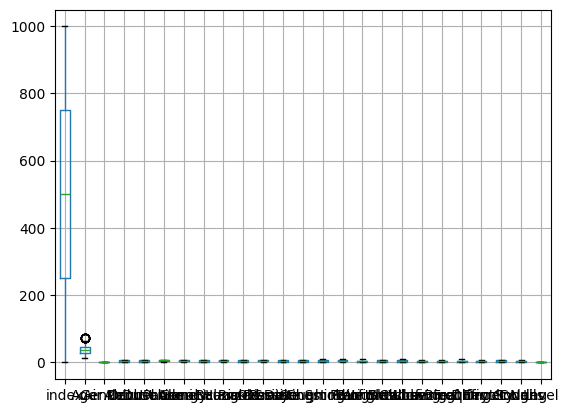

In [6]:
#check for outliers
df.boxplot()

## Data Scaling:

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Assuming df is your DataFrame and you want to scale all columns
features = df.copy()

# Create a LabelEncoder object
le = LabelEncoder()

# Loop over each column in the features DataFrame
for col in features.columns:
    # Check if the column is of object type
    if features[col].dtype == 'object':
        # If yes, convert it into categorical codes
        features[col] = le.fit_transform(features[col])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

# Replace original DataFrame with scaled features DataFrame
df.loc[:, :] = scaled_features_df

## Extract features X and target y from the dataset:

In [8]:

X = df.drop('Level', axis=1)  # Features
y = df['Level']  # Target

## Split X and y into X_train, X_test, y_train, y_test

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN:
Use KNN and find the best K-neighbor value:

In [10]:
 
accuracies = []

# Range of K's to try
k_values = range(1, 21)

for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions with the model
    y_pred = knn.predict(X_test)
    
    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list of accuracies
    accuracies.append(accuracy)

# Find the value of K that has the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]

print(f"The best value for K is {best_k} with an accuracy of {max(accuracies)}")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## Decision Tree
Use decision tree and find the best max depth value:

In [ ]:

accuracies = []

# Range of max depth values to try
max_depth_values = range(1, 21)

for max_depth in max_depth_values:
    # Create and train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    # Make predictions with the model
    y_pred = dt.predict(X_test)
    
    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list of accuracies
    accuracies.append(accuracy)

# Find the value of max depth that has the highest accuracy
best_max_depth = max_depth_values[accuracies.index(max(accuracies))]

print(f"The best value for max depth is {best_max_depth} with an accuracy of {max(accuracies)}")

The best value for max depth is 5 with an accuracy of 1.0


## Random Forest:
Use random forest to find the best number of estimators and max depth:

In [ ]:

parameters = []
accuracies = []

# Range of number of estimators and max depth values to try
n_estimators_values = [10, 50, 100, 200]
max_depth_values = range(1, 21)

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train the Random Forest model
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        rf.fit(X_train, y_train)
        
        # Make predictions with the model
        y_pred = rf.predict(X_test)
        
        # Compute the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append the parameters and the accuracy to the lists
        parameters.append((n_estimators, max_depth))
        accuracies.append(accuracy)

# Find the parameters that give the highest accuracy
best_parameters = parameters[accuracies.index(max(accuracies))]

print(f"The best values are n_estimators={best_parameters[0]} and max_depth={best_parameters[1]} with an accuracy of {max(accuracies)}")

The best values are n_estimators=10 and max_depth=4 with an accuracy of 1.0


## AdaBoost
Use AdaBoost with none in the estimator parameter to find the best value for number of estimators. Use learning_rate = 0.01, Check the website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

accuracies = []

# Range of n_estimators values to try
n_estimators_values = [10, 50, 100, 200, 500]

for n_estimators in n_estimators_values:
    # Create and train the AdaBoost model
    ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=0.01)
    ada.fit(X_train, y_train)
    
    # Make predictions with the model
    y_pred = ada.predict(X_test)
    
    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list of accuracies
    accuracies.append(accuracy)

# Find the value of n_estimators that has the highest accuracy
best_n_estimators = n_estimators_values[accuracies.index(max(accuracies))]

print(f"The best value for n_estimators is {best_n_estimators} with an accuracy of {max(accuracies)}")

c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boos

The best value for n_estimators is 500 with an accuracy of 0.99


In [ ]:
print(df.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


## XGBoost:
Use the slides that uses XGBoost. To install XGBoost, use: pip install xgboost



In [ ]:
print("Unique classes in y_train:", sorted(y_train.unique()))
print("Unique classes in y_test:", sorted(y_test.unique()))

Unique classes in y_train: [1, 2, 3, 4, 5, 6, 7]
Unique classes in y_test: [1, 2, 3, 4, 5, 6, 7]


In [ ]:


# Drop 'Patient Id' column
X_train = X_train.drop('Patient Id', axis=1)
X_test = X_test.drop('Patient Id', axis=1)

# Now you can create and train your model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make prediction
yp = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, yp)

print(f"Accuracy= {accuracy}")

Accuracy= 1.0


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedShuffleSplit

# Now you can create and train your model
model = xgb.XGBClassifier()



for train_index, test_index in ShuffleSplit.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



